In [3]:
# !dir tips.csv
fo = open('./tips.csv')
header = fo.readline().strip().split(',')
print(header,'\n')
lines = fo.readlines()
rows = [line.strip().split(',') for line in lines]
cols = list(zip(*rows))

for name, col in zip(header, cols):
    try:
        float(col[0])
    except:
         print('{}:{}'.format(name, set(col)))

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'] 

sex:{'Female', 'Male'}
smoker:{'Yes', 'No'}
day:{'Fri', 'Thur', 'Sat', 'Sun'}
time:{'Lunch', 'Dinner'}


연예인 이름을 입력하세요(정유미, 이서준, 박서준)박서준


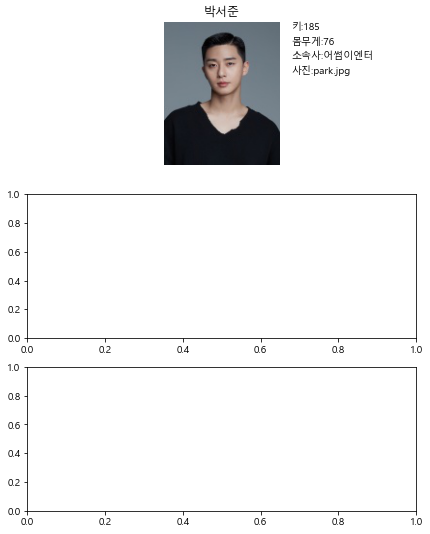

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
d = {'박서준':{'키':185, '몸무게':76, '소속사':'어썸이엔터','사진':'park.jpg'},
'정유미':{'키':163, '몸무게': None, '데뷔':'2004년 영화 폴라로이드 작동법','사진':'jeong.jpg'},
'이서준':{'키':178, '몸무게':68,'데뷔':'1999년 SBS드라마 파도위의 집','사진':'lee.jpg'}
}
Iname = input('연예인 이름을 입력하세요(정유미, 이서준, 박서준)')
fig, ax = plt.subplots(3,1,figsize=(6,9))
for i, name in enumerate(d.keys()):
    if(name  == Iname):
        img = plt.imread(d[name]['사진'])
        ax[i].axis('off')
        ax[i].imshow(img)
        ax[i].set_title(name)
        for j,(k, v) in enumerate(d[name].items()):
            text = str(k)+':'+str(v)
            ax[i].annotate(text, xy=(1.0,0),xytext=(1.1, 1.0-j*0.1),fontsize = 10,ha = 'left', va = 'top', textcoords = 'axes fraction')
plt.subplots_adjust(left=0.0, wspace=0.0)
plt.show()  



## 표준 입출력

In [39]:
a= 123.567; b='hello\tpython'; c=2**64
#a를 소수점 이해 둘째자리까ㅣㅈ 프린드
#b를 문자열로 프린드
#b를 row문자열로 프린트
#c를 지수형식으로 프린트
s1 = '%.2f  %s %r  %.3e'%(a,b,b,c)
s2 = '{:.2f} {} {} {:.3e}'.format((a),b,(b),c)
s3 = f'{a:.2f}  {b:s}  {b:s}  {c:.3e}'
print(s1)
print(s2)
print(s3)

123.57  hello	python 'hello\tpython'  1.845e+19
123.57 hello	python hello	python 1.845e+19
123.57  hello	python  hello	python  1.845e+19


In [12]:
def countNum(s):
    punct = '., '
    d = {}
    for c in s:
        if c in punct:
            continue
        d[c] = d.get(c,0) + 1 
    return d
sentence = input('문장을 입력하세요:')
words = countNum(sentence)
print(words)
    

문장을 입력하세요:i lo
{'i': 1, 'l': 1, 'o': 1}


## 함수

In [16]:
def func(*a, b = 1, c = 2):
    print(b,c)
    return b, b+c
func(1,2)    

1 2


(1, 3)

In [20]:
def add(a,b,c):
    return a+b+c

tup = 1,2,3
add(*tup)

d = {'a':4, 'b':5, 'c':6}


In [24]:
import math
import matplotlib.pyplot as plt
import numpy as np
def distMeasure(a,x):
    measure = math.sqrt(((a[0]-x[0])**2) + ((a[1]-x[1])**2))   
    return measure


A = (1,1)
B = (3,2)
C = (5,7)

AtoB = distMeasure(A,B)
BtoC = distMeasure(B,C)
CtoA = distMeasure(C,A)
print(f'a와b의거리는 {AtoB}, b와c의 거리는 {BtoC}, c와a의 거리는 {CtoA} 이다')

a와b의거리는 2.23606797749979, b와c의 거리는 5.385164807134504, c와a의 거리는 7.211102550927978 이다


In [29]:
points = [(1,1),(3,2), (5,7)]
def distMeasure2(a,x):
    a = no.array(a)
    x = np.array(x)
    return np.sqrt(((a-x)**2).sum(1))

## 제너레이터
* 반복루프를 포함한다
* 반복루프 안에서 yield키워드로 반환한다

### 효과
* 적은 메모리로 대용량 데이터 처리
* 성능 빠름

In [32]:
def myGen(n):
    for i in range(n):
        yield i

In [42]:
mg = myGen(10)


In [51]:
next(mg)

8

전체 데이터 중 미니배치 크기만큼씩 반환하는 제너레이터

In [57]:
fo = open('tips.csv')
data = [line.strip().split(',') for line in fo.readlines()]
len(data)

245

In [62]:
def mbGen(data, batch_size=50):
    chunksize = len(data)//batch_size
    chunksize+=1
    for i in range(chunksize):
        yield data[i*batch_size:(i+1)*batch_size]

In [63]:
for dset in mbGen(data,50):
    print(len(dset))

50
50
50
50
45
